**Redes Neuronales - Funcionalidades taller Uno.**

*Integrantes: Jorge Vildoso - Danilo Muñoz*


El Primer paso es importar las librerias y cargar el modelo que se utilizará, para este caso en concreto utilizaremos un modelo pre-entrenado de TensorFlow.


In [1]:
import tensorflow as tf             #Biblioteca de tensorflow
import tensorflow_datasets as tfds  #Datasets de entrenamiento

from urllib import parse
from http.server import HTTPServer, BaseHTTPRequestHandler

import math
import numpy as np
import matplotlib.pyplot as plt
import logging

logger = tf.get_logger()

logger.setLevel(logging.ERROR)


d:\conda\envs\tf\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Para entrenar a la inteligencia artificial usaremos el dataset de mnist-fashion para reconocer prendas de vestir 


In [2]:
data, metadata = tfds.load('fashion_mnist', as_supervised = True, with_info = True)

Guardamos todos los datos de entrenamiento y pruebas en dos variables distintas.

In [3]:
test_data, fit_data = data['test'], data['train']

Las Imagenes se deben normalizar, esto para que el modelo de inteligencia artificial sea capaz de almacenar cada pixel de la imagen en una neurona para poder procesarlo. Se define una funcion para que cumpla esta tarea.

Tambien se guarda en una variable todas las clasificaciones de las prendas de vestir, esto con el objetivo de mostrar al usuario a través de una interfaz si la IA se equivoco en la prediccion o si esta en lo correcto.

In [4]:
clases = metadata.features['label'].names

def norm(images, labels):
    images = tf.cast(images, tf.float32)
    images /= 255                   
    return images, labels

#Una vez definida la función, los datos de entrenamiento y de prueba deben ser normalizados
test_data = test_data.map(norm)
fit_data = fit_data.map(norm)

#Agregamos en cache los datos para que el proceso de entrenamiento sea mas rapido
test_data = test_data.cache()
fit_data = fit_data.cache()

Se define el modelo con un tipo de capa plano, dos tipo de capa densas y la capa de salida para interpretar la respuesta de la IA.

In [5]:
modelo = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),       # La capa de entrada son de unas 784, cada una por el pixel de la imagen de las prendas de vestir
    tf.keras.layers.Dense(50, activation=tf.nn.relu),     # Luego se utilizan 2 capas densas con las funciones de activación relu, esto hara que el modelo de IA sea capaz de tener mas opciones
    tf.keras.layers.Dense(50, activation=tf.nn.relu),     # a la hora de clasificar las prendas de vestir.
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)   # Por último una capa de salida de 10 neuronas, esto por cada tipo de prenda, la suma de estas neuronas nos dara siempre uno.
])

#se compila el modelo

modelo.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

Establecemos una variable con la cantidad de lotes que usara el modelo para entrenar. Para hacer mas aleatorio el entrenamiento, los datos de entrenamiento (fit_data) deben estar aleatorizados, para aquello utilizamos la funcion '.shuffle' y tambien deben repetirse con la función '.repeat'.

In [6]:
s_size = 32

fit_data = fit_data.repeat().shuffle(60000).batch(s_size)
test_data = test_data.batch(s_size)

Una vez construido el modelo, sera capaz de entrenarlo con la función .fit, esta función permite a la inteligencia artificial clasificar imágenes (en este caso desde un dataset de prendas de vestir) para que luego el usuario pueda testearla mostrandole imagenes y viendo si las predicciones son correctas o erróneas.

In [7]:
import math

historial = modelo.fit(fit_data, epochs=10, steps_per_epoch= math.ceil(60000/s_size))

Epoch 1/10
1875/1875 [==============================] - 5s 1ms/step - loss: 0.5183 - accuracy: 0.8163
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3850 - accuracy: 0.8622
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3457 - accuracy: 0.8742
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3232 - accuracy: 0.8817
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3071 - accuracy: 0.8873
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3007 - accuracy: 0.8889
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2886 - accuracy: 0.8919
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2767 - accuracy: 0.8968
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2716 - accuracy: 0.8999
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.267

Ahora se realizarán pruebas con imagenes de ropa que el modelo nunca vio para comprobar si el modelo fue entrenado exitosamente:

1/1 [==============================] - 0s 27ms/step


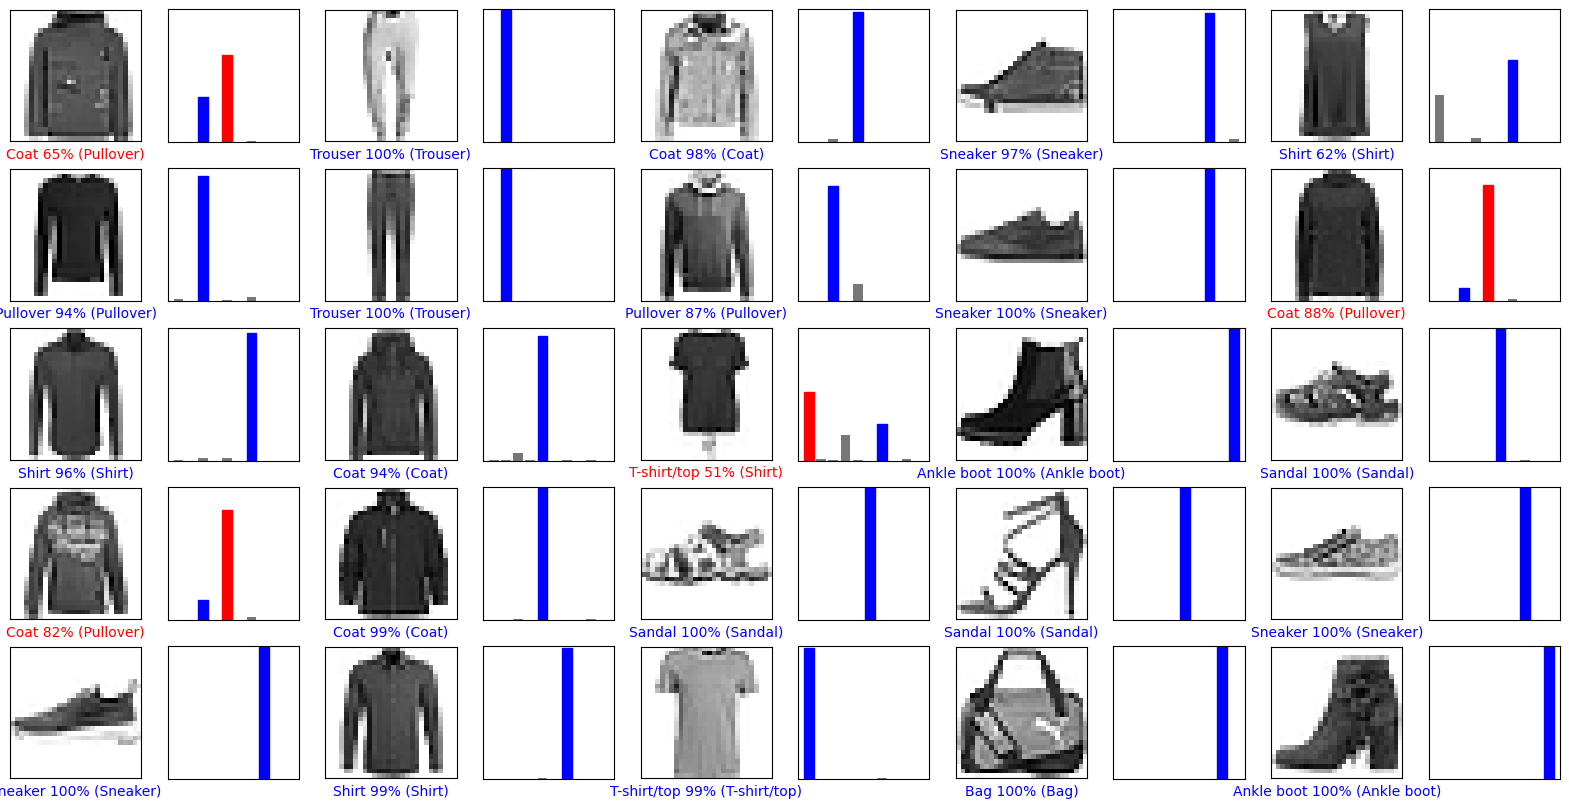

In [16]:
#Set de pruebas

import numpy as np

for imagenes_prueba, etiquetas_prueba in test_data.take(3):
  imagenes_prueba = imagenes_prueba.numpy()
  etiquetas_prueba = etiquetas_prueba.numpy()
  predicciones = modelo.predict(imagenes_prueba)#ejecuta las predicciones
  
def graficar_imagen(i, arr_predicciones, etiquetas_reales, imagenes):#Muestra la imagen que el modelo esta intentando predecir
  arr_predicciones, etiqueta_real, img = arr_predicciones[i], etiquetas_reales[i], imagenes[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  etiqueta_prediccion = np.argmax(arr_predicciones) #Muestra la etiqueta real y luego la etiqueta que el modelo intento predecir
  if etiqueta_prediccion == etiqueta_real:
    color = 'blue'  #Azul = correcto
  else:
    color = 'red'   #Rojo = Erróneo
  
  plt.xlabel("{} {:2.0f}% ({})".format(clases[etiqueta_prediccion],
                                100*np.max(arr_predicciones),
                                clases[etiqueta_real]),
                                color=color)
  
def graficar_valor_arreglo(i, arr_predicciones, etiqueta_real):             #Se grafican los resultados entre 0 y 1 que arroja la prediccion del modelo entre 10 opciones distintas
  arr_predicciones, etiqueta_real = arr_predicciones[i], etiqueta_real[i]   #Cada una representa las 10 opciones de ropa.
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  grafica = plt.bar(range(10), arr_predicciones, color="#777777")
  plt.ylim([0, 1]) 
  etiqueta_prediccion = np.argmax(arr_predicciones)
  
  grafica[etiqueta_prediccion].set_color('red')
  grafica[etiqueta_real].set_color('blue')
  
filas = 5
columnas = 5
num_imagenes = filas*columnas
plt.figure(figsize=(2*2*columnas, 2*filas))
for i in range(num_imagenes):
  plt.subplot(filas, 2*columnas, 2*i+1)
  graficar_imagen(i, predicciones, etiquetas_prueba, imagenes_prueba)
  plt.subplot(filas, 2*columnas, 2*i+2)
  graficar_valor_arreglo(i, predicciones, etiquetas_prueba)

Para efectos del taller se requiere un frontend para la interaccion y testeo del modelo a tráves de una interfaz.

In [9]:
#Exportacion del modelo a h5
modelo.save('modelo_exportado.h5')

Para la exportacion del modelo se debio descargar en las computadoras el software python junto con las librerias de tensorflow, con la finalidad de poder enviar los datos ingresados en el frontend al modelo y que este entregue una prediccion mostrandola en pantalla.

Se intento obtener el model.json desde el entorno de desarrollo en colab pero aunque por mas que se intentase nunca se pudo instalar de manera correcta las librerias de tensorflowjs, las cuales contienen el conversor de acrhivos.

No obstante se ejecuto este mismo codigo en Visual Studio Code, descargando desde Conda las librerias para su correcto funcionamiento y extableciendo un entorno de trabajo con todas éstas, y asi se consiguio extraer el archivo model.json el cual es exportado y utilizado para que funcione de manera independiente en el navegador.

In [10]:
#Instalar tensorflowjs para convertir el h5 a un modelo que pueda cargar tensorflowjs en un explorador
%pip install tensorflowjs

Note: you may need to restart the kernel to use updated packages.


In [11]:
#Convertir el archivo h5 a formato de tensorflowjs
!mkdir tfjs_target_dir
!tensorflowjs_converter --input_format keras modelo_exportado.h5 tfjs_target_dir

2023-04-17 15:26:36.772749: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2023-04-17 15:26:36.773028: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [13]:
#Se listan los archivos dentro de la carpeta tfjs_target_dir

!dir tfjs_target_dir

 El volumen de la unidad C no tiene etiqueta.
 El n�mero de serie del volumen es: 90F9-91B6

 Directorio de c:\Users\Cokexd\Downloads\Taller 1 pruebas\tfjs_target_dir

17-04-2023  15:28    <DIR>          .
17-04-2023  15:28    <DIR>          ..
17-04-2023  15:26           169.240 group1-shard1of1.bin
17-04-2023  15:00             3.766 index3.html
17-04-2023  15:26             2.911 model.json
               3 archivos        175.917 bytes
               2 dirs  245.768.916.992 bytes libres


**Implementación en una página web:**

Entonces la idea principal de este taller es que una vez exportado el modelo ya entrenado se pueda integrar a una interfaz desde una página web en html/js.

Por lo que se opto por hacer la siguiente página que cumpliera con los 3 pasos:
    
    1.- El usuario carga una de las imagenes que tiene alojadas en su computadora (relacionada con una prenda de vestir).
    2.- La página recibe esta imagen y la reescala a una resolucion de 28x28 para que el modelo pueda leer todos sus pixeles.
    3.- Por último el modelo responde con su prediccion y la muestra por pantalla.

Para Testear el correcto funcionamiento de la página se abre un servidor local desde la consola de windows de la siguiente manera: 
    
    Se le entrega la ruta que contiene el archivo .html y el modelo entrenado y se ejecuta la siguiente linea de comando: *python -m http.server 8000*. 
    Luego desde el navegador de introduce la url: *localhost:8000/index3.html*.

Entonces la página que se desarrollo permite al usuario cargar una imagen, luego esa imagen se reescala a una resolucion de 784 pixeles, esos pixeles se almacenan en un arreglo (*arr28*), cada 28 pixeles ese arreglo se almacena dentro de otro arreglo (*arr*) convirtiendolo en una matriz, mientras que el arreglo original se borra para almacenar la siguiente fila de pixeles.  

In [ ]:
for(var i=0, p=0; i<784; i++){

    valor = scaledPixels[i]/255; //Se normalizan los valores ya que la maquina solo detecta valores entre 0 y 1 
    arr28.push([valor]);

    if(p==27){

        console.log("\n");
        arr.push(arr28);
        arr28 = [];
        p=0;
    }
    
    else  
      p++;
}

Una vez obtenido todos los valores de los pixeles éstos se almacenan en una variable tensor la cual es la que recibira el modelo para que pueda predecir lo que es la imagen.

In [ ]:
var tensor4 = tf.tensor4d(arr);
            var resultados = modelo.predict(tensor4).dataSync();
            var indice = resultados.indexOf(Math.max.apply(null, resultados));

            console.log("res: ", resultados);
            console.log("prediccion: ", indice);

Luego esos resultados se muestran por pantalla y se le hacen saber al usuario cual fue la prediccion que el modelo escogió.